In [17]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
plt.rcParams.update({'font.size': 22})

In [34]:
market_area = 'denver'

In [35]:
listing_dates_df = pd.read_csv(f'{market_area}_listing_dates.csv')
listing_dates_df['zipcode'] = listing_dates_df['zipcode'].astype(str)

In [36]:
for event in 'list sale withdrawn expired cancelled'.split():
    column = event + '_date'
    listing_dates_df[column] = pd.to_datetime(listing_dates_df[column]).dt.date

In [37]:
print(listing_dates_df.shape)
listing_dates_df = listing_dates_df[
    (listing_dates_df['list_date'] < datetime.date.today()) &
    ((listing_dates_df['sale_date'] < datetime.date.today()) |
     (listing_dates_df['sale_date'].isna()))]
print(listing_dates_df.shape)

(454252, 11)
(454251, 11)


In [38]:
listing_dates_df.head()

,property_id,zipcode,latitude,longitude,list_date,sale_date,withdrawn_date,expired_date,cancelled_date,current_status,sale_price
0,666680976,80113,39.65232,-104.97613,2016-03-01,NaT,NaT,2016-03-01,NaT,Expired,NaN
1,138826052,80123,39.62523,-105.08648,2016-03-01,NaT,NaT,2016-03-01,NaT,Expired,NaN
2,666683709,80204,39.74122,-105.05241,2016-03-01,NaT,NaT,2016-03-01,NaT,Expired,NaN
3,137981678,80241,39.91465,-104.93076,2016-03-01,2016-04-21,NaT,NaT,NaT,Sale,320000.0
4,410875086,80202,39.74783,-104.98640,2016-03-01,2016-05-02,NaT,NaT,NaT,Sale,475000.0


In [39]:
is_duplicated = listing_dates_df.duplicated('property_id', keep=False)
listing_dates_df_duplicated = listing_dates_df[is_duplicated]
listing_dates_df_duplicated = listing_dates_df_duplicated.sort_values('list_date')

In [40]:
listing_dates_df_duplicated_grouped = listing_dates_df_duplicated.groupby('property_id')

In [41]:
days_cutoff = 365
cnt = 0
days_later_lst = []
rows_to_exclude = []
for _, df in listing_dates_df_duplicated_grouped:
    list_dates = list(df['list_date'])
    days_later = np.array([(list_dates[i + 1] - list_dates[i]).days for i in range(len(list_dates) - 1)])
    days_later_lst.extend(days_later)
    exclude_row = days_later < days_cutoff
    rows = df.index[1:]
    rows_to_exclude.extend(rows[exclude_row])

In [42]:
print(len(listing_dates_df))
listing_dates_df_cleaned = listing_dates_df.drop(rows_to_exclude, axis=0)
print(len(listing_dates_df_cleaned))

454251
440301


In [45]:
print('fraction of duplicate listings:', 
      (len(listing_dates_df) - len(listing_dates_df_cleaned)) / len(listing_dates_df))

fraction of duplicate listings: 0.030709893869248498


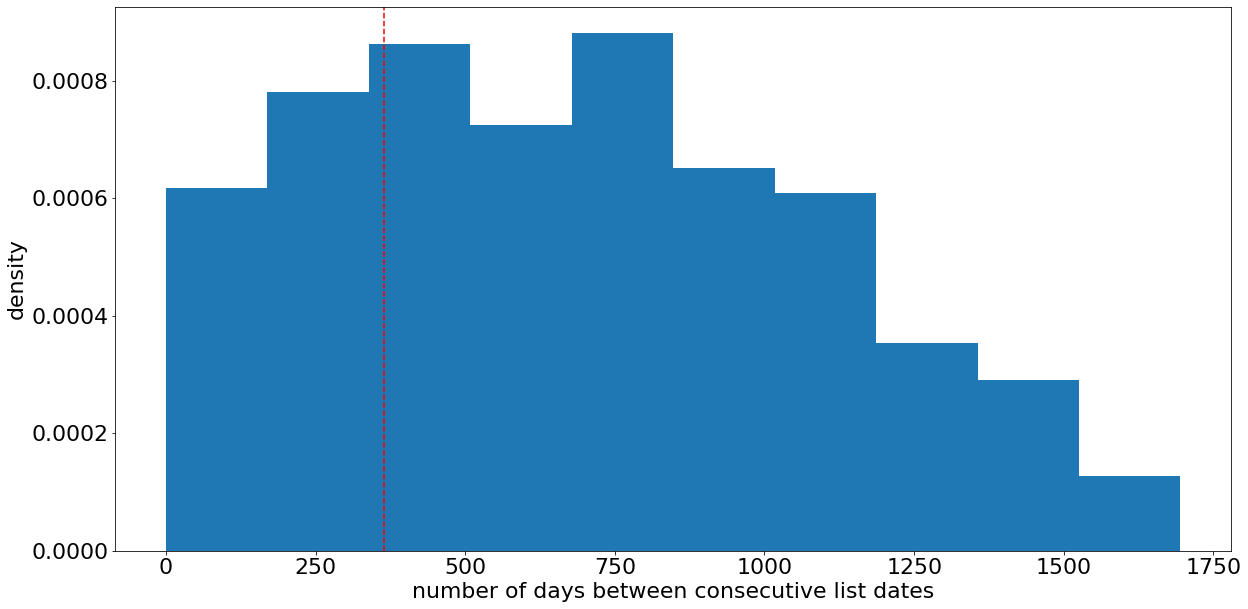

In [43]:
plt.figure(figsize=(20, 10))
plt.hist(days_later_lst, bins=10, density=True)
plt.xlabel('number of days between consecutive list dates')
plt.ylabel('density')
plt.axvline(x=days_cutoff, color='red', linestyle='--')
plt.show()

In [46]:
listing_dates_df_cleaned.to_csv(f'{market_area}_listing_dates_cleaned.csv', index=False)